In [64]:
import Pkg
Pkg.add(["Plots","Distributions","Random","LsqFit","Statistics","Turing","FillArrays","StatsPlots"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [65]:
using Plots, StatsPlots, Distributions, Random, LsqFit, Statistics, Turing, FillArrays

In [32]:
@. model(x, p) = p[3] + p[1] * exp(-x * p[2])

model (generic function with 1 method)

In [33]:
xdata = range(0, stop=10, length=20)

0.0:0.5263157894736842:10.0

In [46]:
ydata = model(xdata, [1.0 2.0 0.5]) + 0.1*randn(length(xdata))

20-element Vector{Float64}:
 1.4908396724962079
 0.8114459444248165
 0.456105422810976
 0.5234047711596249
 0.16146393271294257
 0.4197266119584224
 0.6109979376441071
 0.4121764990277912
 0.5545776318103833
 0.5234937192193968
 0.4781505034469851
 0.4218504823057712
 0.4500004484932517
 0.5115926947973195
 0.6290051407479138
 0.356037585324005
 0.508734824630624
 0.4180884612949643
 0.6108548744198632
 0.41119898305083546

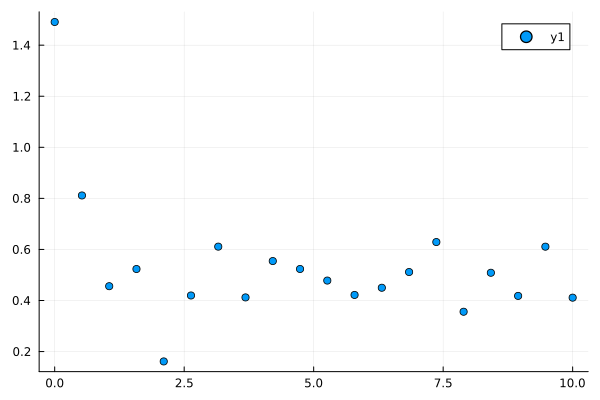

In [47]:
scatter(xdata, ydata)

In [48]:
p0 = [0.5, 0.5, 0.0]

3-element Vector{Float64}:
 0.5
 0.5
 0.0

In [49]:
fit = curve_fit(model, xdata, ydata, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([1.0337796348899362, 2.480323325681485, 0.4670779990654569], [0.010017961459185099, -0.06415675112211483, 0.08692523649838535, -0.03573941970866079, 0.3111943722546906, 0.048863957221867926, -0.14350994880525897, 0.05501262983762473, -0.08746951045105367, -0.05640755535396286, -0.011070291271233657, 0.04522811663441495, 0.017077713171281983, -0.044514651658561166, -0.16192712973616585, 0.11104041697955447, -0.04165682468746307, 0.048989538008398725, -0.14377687528992067, 0.055879016032100604], [0.9999999999962095 0.0 1.0000000000052196; 0.2710550534894257 -0.14747957591876018 0.9999999999960525; … ; 6.207311783676224e-11 -6.116784679444773e-10 0.9999999999960525; 1.773517652478921e-11 -1.7555726421367172e-10 0.9999999999960525], true, Float64[])

In [50]:
coef(fit)

3-element Vector{Float64}:
 1.0337796348899362
 2.480323325681485
 0.4670779990654569

In [39]:
dof(fit)

17

In [51]:
x_fit = 0:0.01:10
y_fit = model(x_fit, coef(fit))

1001-element Vector{Float64}:
 1.500857633955393
 1.4755319345022193
 1.450826668099906
 1.4267266352799726
 1.4032170089329565
 1.3802833251863036
 1.3579114745057312
 1.3360876930145928
 1.3147985540259017
 1.2940309597818036
 1.2737721333954197
 1.2540096109900967
 1.2347312340312326
 ⋮
 0.46707799908841896
 0.46707799908785647
 0.4670779990873077
 0.4670779990867724
 0.4670779990862502
 0.4670779990857408
 0.4670779990852439
 0.46707799908475917
 0.46707799908428627
 0.46707799908382497
 0.467077999083375
 0.46707799908293607

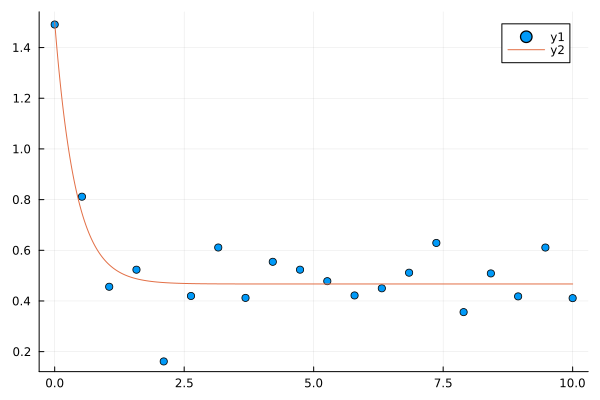

In [52]:
scatter(xdata, ydata)
plot!(x_fit, y_fit)

In [53]:
stderror(fit)

3-element Vector{Float64}:
 0.11575718687498783
 0.7194737805575459
 0.027845289101961483

In [54]:
confidence_interval(fit, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (0.7895533187749245, 1.278005951004948)
 (0.9623663356185459, 3.9982803157444247)
 (0.40832957434886624, 0.5258264237820475)

In [55]:
margin_error(fit, 0.05)

3-element Vector{Float64}:
 0.24422631611501167
 1.5179569900629393
 0.05874842471659062

In [85]:
@model function expfit(x,y)
    ampl ~ Uniform(0.0,5.0)
    rate ~ Uniform(0.0,10.0)
    offset ~ Uniform(-10.0,10.0)
    for i in 1:length(y)
        y[i] ~ Normal(offset + ampl * exp(-rate*x[i]),0.1)
    end
end

expfit (generic function with 2 methods)

In [87]:
model_turing = expfit(xdata, ydata)

DynamicPPL.Model{typeof(expfit), (:x, :y), (), (), Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(expfit, (x = 0.0:0.5263157894736842:10.0, y = [1.4908396724962079, 0.8114459444248165, 0.456105422810976, 0.5234047711596249, 0.16146393271294257, 0.4197266119584224, 0.6109979376441071, 0.4121764990277912, 0.5545776318103833, 0.5234937192193968, 0.4781505034469851, 0.4218504823057712, 0.4500004484932517, 0.5115926947973195, 0.6290051407479138, 0.356037585324005, 0.508734824630624, 0.4180884612949643, 0.6108548744198632, 0.41119898305083546]), NamedTuple(), DynamicPPL.DefaultContext())

In [88]:
chain = sample(model_turing, NUTS(0.65), 2000)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Info: Found initial step size
└   ϵ = 0.00625
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (tru

Chains MCMC chain (2000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 1
Samples per chain = 2000
Wall duration     = 0.79 seconds
Compute duration  = 0.79 seconds
parameters        = ampl, rate, offset
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

        ampl    1.0342    0.0998     0.0022    0.0027   1108.3322    1.0002    ⋯
        rate    3.1510    1.3172     0.0295    0.0742    303.8991    1.0002    ⋯
      offset    0.4697    0.0241     0.0005    0.0007   1423.5385    0.9998    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%  

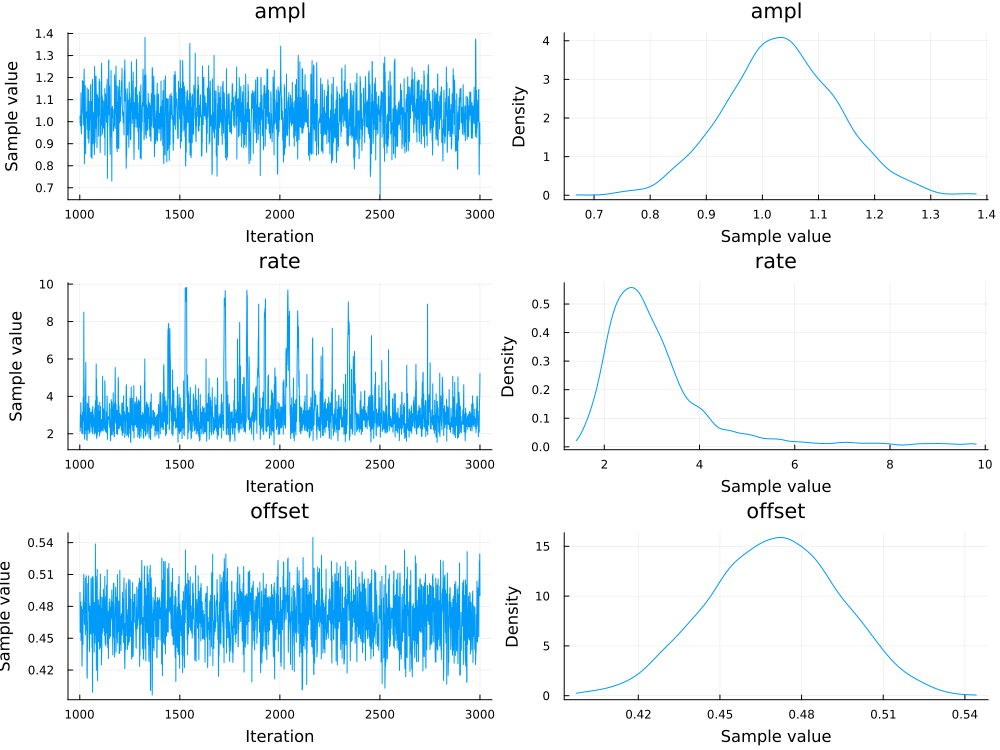

In [89]:
plot(chain)

In [76]:
std(chain[:ampl])

0.10135667705805282

In [77]:
std(chain[:rate])

1.2861490146481027

In [90]:
std(chain[:offset])

0.024108691725271053